### Loading and prerequesites

In [27]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
VARIANT = "LARGE" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_full.pkl")

### Dictionary qual_mediaframes

In [29]:
# Create an empty dictionary
qual_mediaframes = {}

# Read the CSV file
with open("../Data/Dictionaries/qual_mediaframes.csv", "r") as f:
    # Skip the header line
    next(f)
    
    # Iterate over each line in the CSV
    for line in f:
        # Split the line by the delimiter
        columns = line.strip().split(";")
        
        # Extract the key and value
        key = columns[1]
        value = columns[0]

        # Replace whitespaces in the key with underscores
        key = key.replace(" ", "_")
        
        # Check if the key already exists in the dictionary
        if key in qual_mediaframes:
            # Append the value to the existing list
            qual_mediaframes[key].append(value)
        else:
            # Create a new list with the value
            qual_mediaframes[key] = [value]

In [30]:
print(qual_mediaframes)

{'future_orientation': ['künftige generationen', 'zukünftige herausforderungen', 'zukunft', 'ernähren', 'weltbevölkerung', 'klimaschutz', 'fridays for future', 'klimawechsel', 'treibhauseffekt', 'globale erwärmung', 'hitze', 'erwärmung', 'hunger', 'dürre', 'rodung', 'urwaldzerstörung', 'mangelernährung', 'klima', 'klimabedingungen', 'klimawandel', 'massentierhaltung'], 'globalized_economy': ['großkonzerne', 'gewinnorientierung', 'kapitalismus', 'globalisierung', 'profitmaximierung', 'monopolisierung', 'marktmacht', 'aktienkurs', 'börse', 'marktdominanz', 'saatguthersteller', 'weltmarkt'], 'environmental_issues': ['fleischerzeugung', 'fleischproduktion', 'massentierhaltung', 'flesichkonsum', 'sojabohnen', 'glyphosat', 'pflanzenschutzmittel', 'herbizide', 'bananen'], 'methodological_revolution': ['neubewertung', 'umdenken', 'trendwende', 'forschung', 'genschere', 'crispr', 'nobelpreis', 'biotechnologie', 'exakt', 'präzise', 'wissenschaft'], 'political_responsibility': ['europäische kommi

In [31]:
# Add a column in df for each key in the dictionary
for key in qual_mediaframes.keys():
    key = key.replace(" ", "_")
    df[key] = 0

# Load the German language model in Spacy
nlp = spacy.load('de_core_news_sm')

# Iterate over each row in the dataframe and count the number of times each key appears
for i, row in df.iterrows():
    # Get the text
    text = row["text"]
    
    # Create a spacy doc
    doc = nlp(text)
    
    # Iterate over each key in the dictionary
    for key in qual_mediaframes.keys():
        # Iterate over each value in the list
        for value in qual_mediaframes[key]:
            # Check if the value is in the doc
            if value in doc.text:
                # Increment the counter
                df.loc[i, key] += 1

In [32]:
df.head()

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,future_orientation,globalized_economy,environmental_issues,methodological_revolution,political_responsibility,individual_concerns,preserving_tradition,negative_mobilisation
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,0,0,0,0,3,0,0,0
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,0,0,0,0,2,0,1,0
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,0,0,0,0,1,0,0,0
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,0,0,0,0,0,0,0,0
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,0,0,0,0,0,0,1,0


In [33]:
# Create a new dataframe to store the aggregated data
yearly_data = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data['article_count'] = df.groupby('publication_year')['text'].count()
yearly_data['word_count'] = df.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data.index.names = ['year']

# Group the dataframe by year and calculate the count for each key
for key in qual_mediaframes.keys():
    yearly_data[key] = df.groupby('publication_year')[key].sum()

# Display the resulting dataframe
yearly_data

,article_count,word_count,future_orientation,globalized_economy,environmental_issues,methodological_revolution,political_responsibility,individual_concerns,preserving_tradition,negative_mobilisation
year,,,,,,,,,,
1992,3,1214,1,0,0,0,4,0,2,0
1993,6,3921,2,0,0,0,5,0,8,0
1994,18,9408,3,0,0,9,19,8,12,3
1995,20,5510,1,0,0,2,19,4,8,2
1996,29,12124,0,0,1,9,25,8,16,2
1997,49,28409,5,0,0,21,51,20,48,15
1998,60,31397,4,0,0,22,64,12,34,6
1999,97,58204,5,0,0,49,110,18,80,24
2000,100,62409,4,1,0,43,107,22,82,18


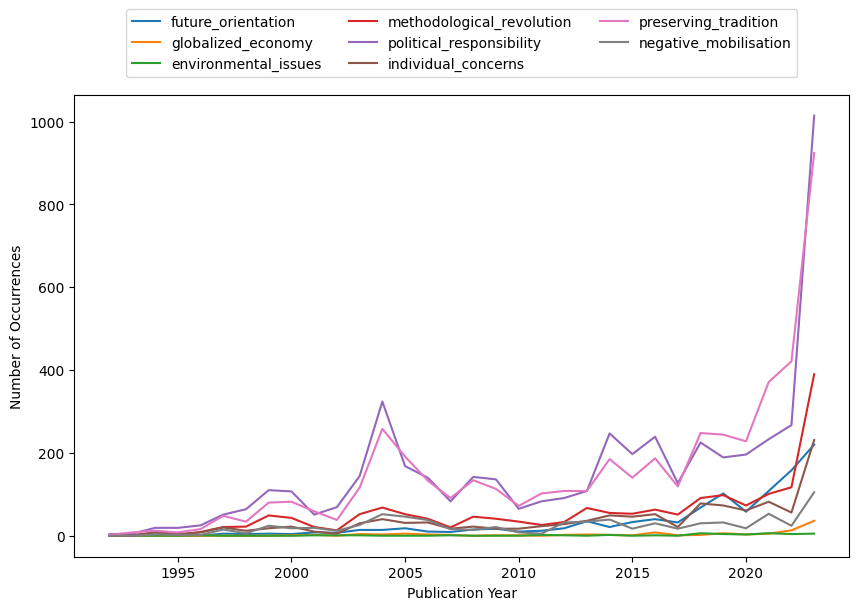

In [34]:
# Create a list of keys to plot
keys_to_plot = list(qual_mediaframes.keys())

# Create a new dataframe with only the columns of interest
plot_data = yearly_data[keys_to_plot]

# Plot the data
plot_data.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.savefig('../Visuals/qual_mediaframes_total.png')
plt.show()

In [35]:
# Copy the dataframe plot_data to a new dataframe plot_data_percentage_article
plot_data_percentage_article = plot_data.copy()

# Add a new column to the dataframe plot_data called 'publication_count' with the value of the column 'article_count' of the dataframe yearly_data using loc
plot_data_percentage_article['publication_count'] = yearly_data.loc[:, 'article_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage_article[key + '_percentage'] = plot_data_percentage_article[key] / plot_data_percentage_article['publication_count']

# Remove the columns for the keys
plot_data_percentage_article = plot_data_percentage_article.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage_article = plot_data_percentage_article.drop(columns=['publication_count'])

plot_data_percentage_article

,future_orientation_percentage,globalized_economy_percentage,environmental_issues_percentage,methodological_revolution_percentage,political_responsibility_percentage,individual_concerns_percentage,preserving_tradition_percentage,negative_mobilisation_percentage
year,,,,,,,,
1992,0.333333,0.000000,0.000000,0.000000,1.333333,0.000000,0.666667,0.000000
1993,0.333333,0.000000,0.000000,0.000000,0.833333,0.000000,1.333333,0.000000
1994,0.166667,0.000000,0.000000,0.500000,1.055556,0.444444,0.666667,0.166667
1995,0.050000,0.000000,0.000000,0.100000,0.950000,0.200000,0.400000,0.100000
1996,0.000000,0.000000,0.034483,0.310345,0.862069,0.275862,0.551724,0.068966
1997,0.102041,0.000000,0.000000,0.428571,1.040816,0.408163,0.979592,0.306122
1998,0.066667,0.000000,0.000000,0.366667,1.066667,0.200000,0.566667,0.100000
1999,0.051546,0.000000,0.000000,0.505155,1.134021,0.185567,0.824742,0.247423
2000,0.040000,0.010000,0.000000,0.430000,1.070000,0.220000,0.820000,0.180000


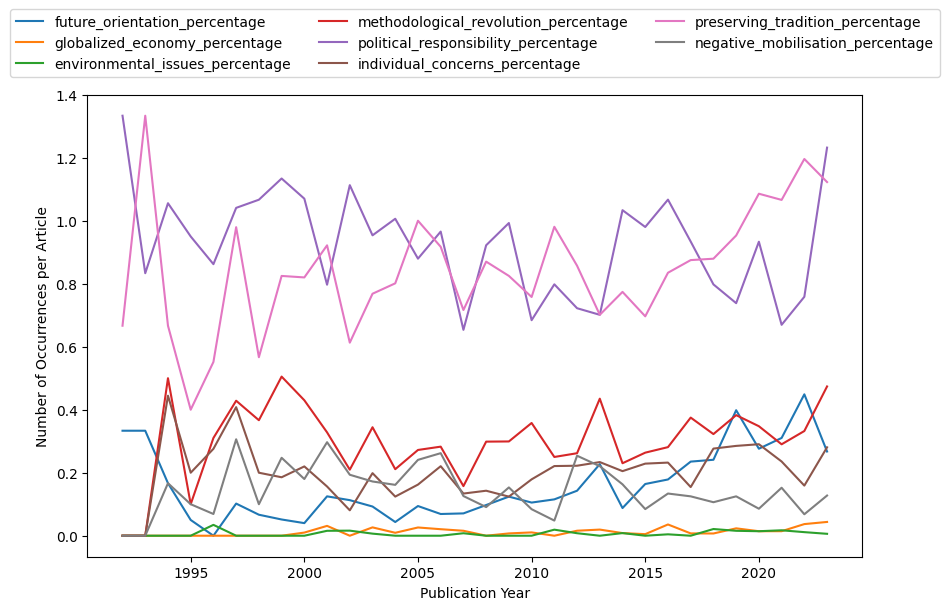

In [42]:
# Plot the data
plot_data_percentage_article.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Article')
plt.savefig('../Visuals/qual_mediaframes_per_article.png')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.show()

In [38]:
# Copy the dataframe plot_data to a new dataframe plot_data_percentage_word
plot_data_percentage_word = plot_data.copy()

# Add a new column to the dataframe plot_data called 'word_count' with the value of the column 'word_count' of the dataframe yearly_data using loc
plot_data_percentage_word['word_count'] = yearly_data.loc[:, 'word_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage_word[key + '_percentage'] = plot_data_percentage_word[key] / plot_data_percentage_word['word_count']

# Remove the columns for the keys
plot_data_percentage_word = plot_data_percentage_word.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage_word = plot_data_percentage_word.drop(columns=['word_count'])

plot_data_percentage_word

,future_orientation_percentage,globalized_economy_percentage,environmental_issues_percentage,methodological_revolution_percentage,political_responsibility_percentage,individual_concerns_percentage,preserving_tradition_percentage,negative_mobilisation_percentage
year,,,,,,,,
1992,0.000824,0.000000,0.000000,0.000000,0.003295,0.000000,0.001647,0.000000
1993,0.000510,0.000000,0.000000,0.000000,0.001275,0.000000,0.002040,0.000000
1994,0.000319,0.000000,0.000000,0.000957,0.002020,0.000850,0.001276,0.000319
1995,0.000181,0.000000,0.000000,0.000363,0.003448,0.000726,0.001452,0.000363
1996,0.000000,0.000000,0.000082,0.000742,0.002062,0.000660,0.001320,0.000165
1997,0.000176,0.000000,0.000000,0.000739,0.001795,0.000704,0.001690,0.000528
1998,0.000127,0.000000,0.000000,0.000701,0.002038,0.000382,0.001083,0.000191
1999,0.000086,0.000000,0.000000,0.000842,0.001890,0.000309,0.001374,0.000412
2000,0.000064,0.000016,0.000000,0.000689,0.001714,0.000353,0.001314,0.000288


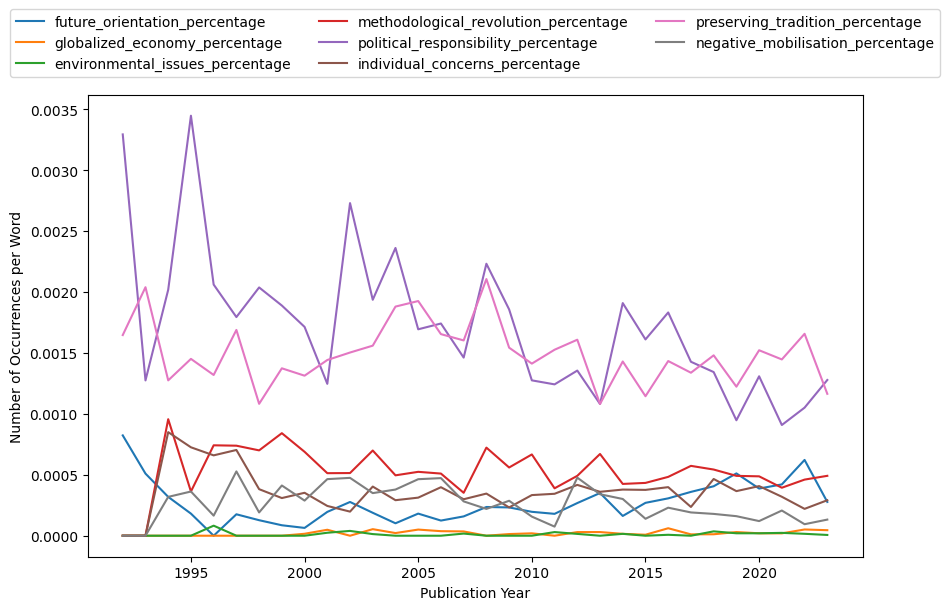

In [41]:
# Plot the data
plot_data_percentage_word.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Word')
plt.savefig('../Visuals/qual_mediaframes_per_word.png')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.show()